In [1]:
import pandas as pd
import pvlib

In [2]:
# Retrieve NSRDB PSM3 timeseries weather data from the PSM3 API.
# Section 2.3 has introduced how to obtain the API key.
data = pvlib.iotools.get_psm3(
    latitude=38.2544, 
    longitude=-104.6091, 
    api_key='please input your api_key', 
    email='please input your email', 
    names='tmy', 
    interval=60, 
    attributes=('air_temperature', 'dhi', 'dni', 'ghi', 'wind_speed'), 
    leap_day=False, 
    full_name='pvlib python', 
    affiliation='pvlib python', 
    timeout=60)

In [3]:
print(data)

(                           Year  Month  Day  Hour  Minute  Temperature  DHI  \
2004-01-01 00:30:00-07:00  2004      1    1     0      30          0.0  0.0   
2004-01-01 01:30:00-07:00  2004      1    1     1      30          0.0  0.0   
2004-01-01 02:30:00-07:00  2004      1    1     2      30          0.0  0.0   
2004-01-01 03:30:00-07:00  2004      1    1     3      30          0.0  0.0   
2004-01-01 04:30:00-07:00  2004      1    1     4      30          0.0  0.0   
...                         ...    ...  ...   ...     ...          ...  ...   
1999-12-31 19:30:00-07:00  1999     12   31    19      30          2.0  0.0   
1999-12-31 20:30:00-07:00  1999     12   31    20      30          1.0  0.0   
1999-12-31 21:30:00-07:00  1999     12   31    21      30          0.0  0.0   
1999-12-31 22:30:00-07:00  1999     12   31    22      30          0.0  0.0   
1999-12-31 23:30:00-07:00  1999     12   31    23      30          0.0  0.0   

                           DNI  GHI  Wind Speed  


In [4]:
df = data[0]
# df.to_csv('NSRDB_download_data.csv')
# Since the code does not provide usable API_key, we store the downloaded data locally, namely NSRDB_download_data.csv.
# If you successfully apply for the API, you will get the same data as me.  
print(df)

                           Year  Month  Day  Hour  Minute  Temperature  DHI  \
2004-01-01 00:30:00-07:00  2004      1    1     0      30          0.0  0.0   
2004-01-01 01:30:00-07:00  2004      1    1     1      30          0.0  0.0   
2004-01-01 02:30:00-07:00  2004      1    1     2      30          0.0  0.0   
2004-01-01 03:30:00-07:00  2004      1    1     3      30          0.0  0.0   
2004-01-01 04:30:00-07:00  2004      1    1     4      30          0.0  0.0   
...                         ...    ...  ...   ...     ...          ...  ...   
1999-12-31 19:30:00-07:00  1999     12   31    19      30          2.0  0.0   
1999-12-31 20:30:00-07:00  1999     12   31    20      30          1.0  0.0   
1999-12-31 21:30:00-07:00  1999     12   31    21      30          0.0  0.0   
1999-12-31 22:30:00-07:00  1999     12   31    22      30          0.0  0.0   
1999-12-31 23:30:00-07:00  1999     12   31    23      30          0.0  0.0   

                           DNI  GHI  Wind Speed  
2

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pvlib
from pvlib.pvsystem import PVSystem
from pvlib.location import Location
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS
from pvlib import atmosphere

In [6]:
# Dictionary of temperature parameters organized by model.
# Retrieve the open rack glass-glass configuration for SAPM:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']
# load some module and inverter specifications
sandia_modules = pvlib.pvsystem.retrieve_sam('SandiaMod')
cec_inverters = pvlib.pvsystem.retrieve_sam('cecinverter')
sandia_module = sandia_modules['Canadian_Solar_CS5P_220M___2009_']
cec_inverter = cec_inverters['ABB__MICRO_0_25_I_OUTD_US_208__208V_']

In [7]:
# time zone
tz = 'Etc/GMT+7'
# latitude and longitude
lat, lon = 38.25, -104.62

In [8]:
Times = df.index

In [9]:
print(Times)

DatetimeIndex(['2004-01-01 00:30:00-07:00', '2004-01-01 01:30:00-07:00',
               '2004-01-01 02:30:00-07:00', '2004-01-01 03:30:00-07:00',
               '2004-01-01 04:30:00-07:00', '2004-01-01 05:30:00-07:00',
               '2004-01-01 06:30:00-07:00', '2004-01-01 07:30:00-07:00',
               '2004-01-01 08:30:00-07:00', '2004-01-01 09:30:00-07:00',
               ...
               '1999-12-31 14:30:00-07:00', '1999-12-31 15:30:00-07:00',
               '1999-12-31 16:30:00-07:00', '1999-12-31 17:30:00-07:00',
               '1999-12-31 18:30:00-07:00', '1999-12-31 19:30:00-07:00',
               '1999-12-31 20:30:00-07:00', '1999-12-31 21:30:00-07:00',
               '1999-12-31 22:30:00-07:00', '1999-12-31 23:30:00-07:00'],
              dtype='datetime64[ns, Etc/GMT+7]', length=8760, freq=None)


In [10]:
# Calculate the solar position using a python implementation of the NREL SPA algorithm.
position = pvlib.solarposition.spa_python(time=Times, latitude=lat, longitude=lon,  altitude=1446)

In [11]:
# Location objects are convenient containers for latitude, longitude, timezone, and altitude data associated with a particular geographic location.
location = Location(latitude=lat, longitude=lon,tz=tz,name='Pueblo')

In [12]:
# A total of 5 variables, namely, DHI, DNI, GHI, temperature, and wind speed, are provided for model chain.
weather = df.iloc[:,[5,6,7,8,9]]

In [13]:
weather.head()

,Temperature,DHI,DNI,GHI,Wind Speed
2004-01-01 00:30:00-07:00,0.0,0.0,0.0,0.0,3.0
2004-01-01 01:30:00-07:00,0.0,0.0,0.0,0.0,3.0
2004-01-01 02:30:00-07:00,0.0,0.0,0.0,0.0,2.8
2004-01-01 03:30:00-07:00,0.0,0.0,0.0,0.0,2.6
2004-01-01 04:30:00-07:00,0.0,0.0,0.0,0.0,2.4


In [14]:
weather = weather.rename(columns={'DHI':'dhi','DNI':'dni','GHI':'ghi','Temperature':'temp_air','Wind Speed':'wind_speed'})

In [15]:
print(weather)

                           temp_air  dhi  dni  ghi  wind_speed
2004-01-01 00:30:00-07:00       0.0  0.0  0.0  0.0         3.0
2004-01-01 01:30:00-07:00       0.0  0.0  0.0  0.0         3.0
2004-01-01 02:30:00-07:00       0.0  0.0  0.0  0.0         2.8
2004-01-01 03:30:00-07:00       0.0  0.0  0.0  0.0         2.6
2004-01-01 04:30:00-07:00       0.0  0.0  0.0  0.0         2.4
...                             ...  ...  ...  ...         ...
1999-12-31 19:30:00-07:00       2.0  0.0  0.0  0.0         2.1
1999-12-31 20:30:00-07:00       1.0  0.0  0.0  0.0         2.4
1999-12-31 21:30:00-07:00       0.0  0.0  0.0  0.0         2.7
1999-12-31 22:30:00-07:00       0.0  0.0  0.0  0.0         2.9
1999-12-31 23:30:00-07:00       0.0  0.0  0.0  0.0         3.0

[8760 rows x 5 columns]


In [16]:
print(weather.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2004-01-01 00:30:00-07:00 to 1999-12-31 23:30:00-07:00
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp_air    8760 non-null   float64
 1   dhi         8760 non-null   float64
 2   dni         8760 non-null   float64
 3   ghi         8760 non-null   float64
 4   wind_speed  8760 non-null   float64
dtypes: float64(5)
memory usage: 410.6 KB
None


In [22]:
# create a PVSystem object, and a ModelChain object.
system = PVSystem(surface_tilt=lat, surface_azimuth=180,
                  module_parameters=sandia_module,
                  inverter_parameters=cec_inverter,
                  temperature_model_parameters=temperature_model_parameters)
mc = ModelChain(system, 
                location, 
                transposition_model='perez', 
                solar_position_method='nrel_numpy',
                losses_model = 'pvwatts')

In [23]:
mc.run_model(weather)

ModelChain: 
  name: None
  clearsky_model: ineichen
  transposition_model: perez
  solar_position_method: nrel_numpy
  airmass_model: kastenyoung1989
  dc_model: sapm
  ac_model: sandia_inverter
  aoi_model: sapm_aoi_loss
  spectral_model: sapm_spectral_loss
  temperature_model: sapm_temp
  losses_model: pvwatts_losses

C:\WWT\software\anaconda\lib\site-packages\pvlib\modelchain.py:499: pvlibDeprecationWarning: ModelChain.ac is deprecated and will be removed in v0.10. Use ModelChain.results.ac instead
  warnings.warn(msg, pvlibDeprecationWarning)


<AxesSubplot:>

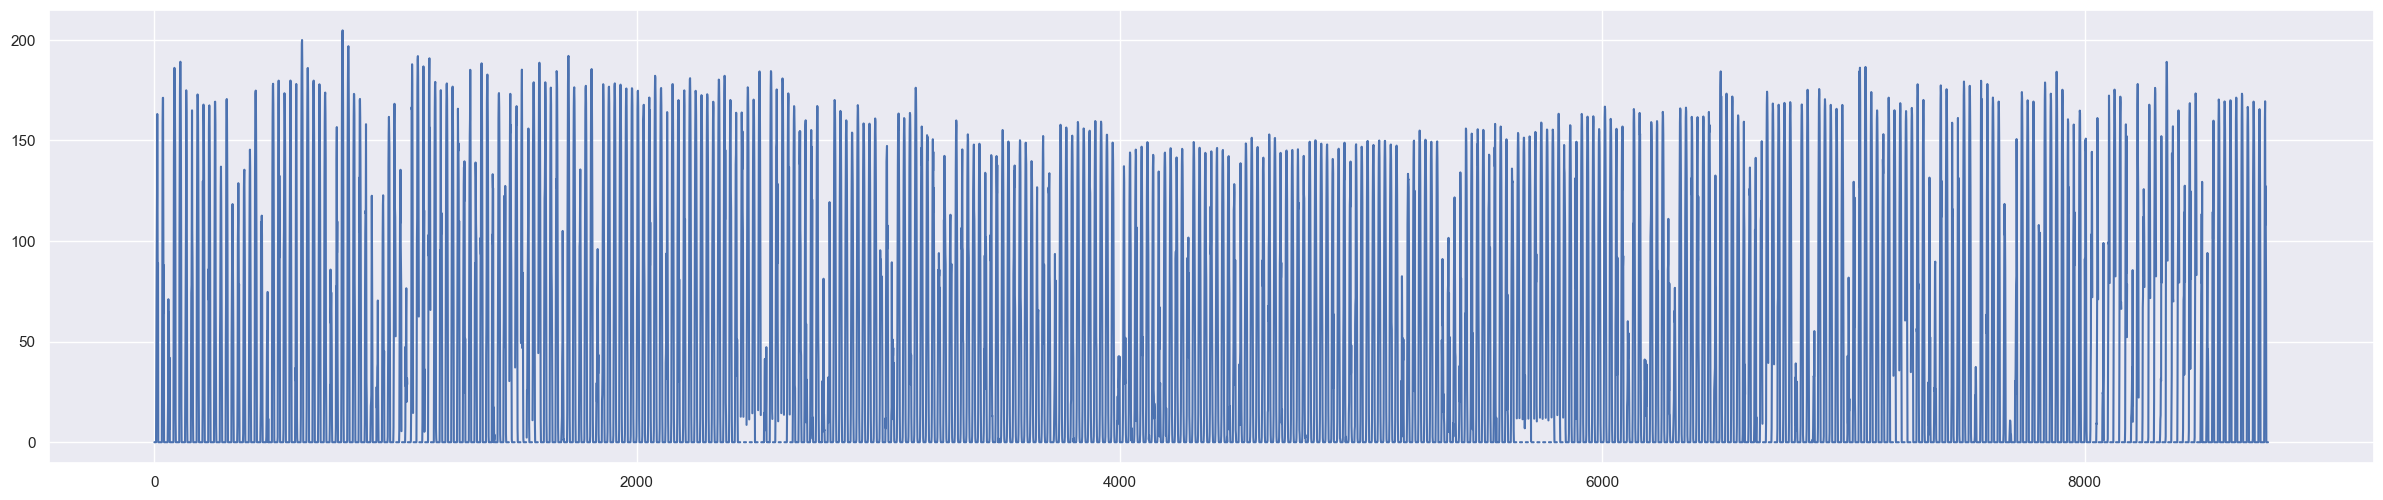

In [33]:
# plotting PV output power
pv = mc.ac
pv.index = range(8760)
sns.set_theme(style="darkgrid")
plt.figure(dpi=100, figsize=(30,6))
sns.lineplot(data=pv)